# Check features, we are missing meaningful columns such as 3_6kW and 7_2kW etc

# Feature engeneiring
- Transforming Features

# Feature Engineering and Further Cleaning Steps...

### 1. Feature Engineering
- Extract datetime features

df['hour_of_day'] = df['Start_plugin'].dt.hour
df['day_of_week'] = df['Start_plugin'].dt.dayofweek
df['month'] = df['Start_plugin'].dt.month

### 2. Encoding Categorical Variables
- Example: One-hot encoding for 'User_type' column

df = pd.get_dummies(df, columns=['User_type'], prefix='user_type')

### 3. Correlation Analysis
- Explore the correlation matrix

correlation_matrix = df.corr()

### 4. Feature Scaling (if needed)
- Standardize or normalize numerical features

### 5. Handling Outliers
- Identify and handle outliers in numerical features

### 6. Check for Imbalanced Classes (if Classification)
- Explore the distribution of classes and handle imbalances

### 7. Check for Skewed Target Variable (if Regression)
- Address skewness if necessary using transformations

### 8. Other Steps Based on Data Characteristics
- Any other preprocessing steps based on insights from EDA

### Update X and y after adding new features or encoding
X = df.drop(['El_kWh'], axis=1)
y = df['El_kWh']


### Feature engineering

**Date and Time Features:**
- Hour of the day
- Day of the week
- Month
- Year
- Weekend/weekday indicator
- Working/non-working hour indicator

**Temporal Features:**
- Lag features for energy consumption
- Rolling mean and rolling standard deviation for energy consumption

**Weather-Related Features:**
- Temperature
- Humidity
- Wind speed
- Precipitation
- Solar radiation
- Dew point

**Holiday Features:**
- Indicator for holidays
- Days before/after holidays

**Geographical Features:**
- Latitude and longitude

**Cyclical Features:**
- Encode cyclic time features using sine and cosine transformations (e.g., hour of the day, month)

**Interaction Terms:**
- Multiplicative or additive interactions between features
- Ratios between relevant features

**Feature Scaling:**
- Standardization or normalization of numerical features

**Outlier Handling:**
- Identification and handling of outliers

**Missing Data Handling:**
- Imputation or removal of missing data

**Domain-Specific Features:**
- Features relevant to the specific domain of energy consumption (e.g., industrial production, occupancy rates)

**PCA (Principal Component Analysis):**
- Dimensionality reduction for a large number of features

In [305]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [306]:
# Import necessary libraries  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from scipy import stats
import seaborn as sns
from scipy.stats import norm 
import statistics 

import warnings
warnings.filterwarnings('ignore')

In [307]:
df = pd.read_csv('/Users/zhassulan/Desktop/Capstone Project/energy_consumption.csv')


In [308]:
df.head()

,session_ID,Garage_ID,User_ID,User_type,Shared_ID,Start_plugin,Start_plugin_hour,End_plugout,End_plugout_hour,El_kWh,...,solar_rad,t_dhi,t_dni,t_ghi,t_solar_rad,temp,ts,wind_dir,wind_gust_spd,wind_spd
0,24,Bl2,Bl2-4,Private,Private,2019-01-09 16:00:00,16,10.01.2019 10:20,10.0,187.0,...,1,115,879,129,25,-0.1,1546988400,225,7.6,2.4
1,25,AdO1,AdO1-2,Private,Private,2019-01-09 20:00:00,20,10.01.2019 15:19,15.0,1038.0,...,1,115,879,129,25,-0.1,1546988400,225,7.6,2.4
2,28,UT9,Share-12,Shared,Shared-12,2019-01-10 16:00:00,16,10.01.2019 17:20,17.0,51.0,...,1,119,915,137,18,4.4,1547074800,218,26.8,5.7
3,29,AdO1,AdO1-2,Private,Private,2019-01-10 23:00:00,23,11.01.2019 18:10,18.0,835.0,...,1,119,915,137,18,4.4,1547074800,218,26.8,5.7
4,30,UT9,Share-12,Shared,Shared-12,2019-01-11 15:00:00,15,11.01.2019 17:07,17.0,117.0,...,2,124,954,145,38,1.4,1547161200,260,23.6,7.0


In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 53 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   session_ID                            6819 non-null   int64  
 1   Garage_ID                             6819 non-null   object 
 2   User_ID                               6819 non-null   object 
 3   User_type                             6819 non-null   object 
 4   Shared_ID                             6819 non-null   object 
 5   Start_plugin                          6819 non-null   object 
 6   Start_plugin_hour                     6819 non-null   int64  
 7   End_plugout                           6819 non-null   object 
 8   End_plugout_hour                      6819 non-null   float64
 9   El_kWh                                6819 non-null   float64
 10  Duration_hours                        6819 non-null   float64
 11  month_plugin     

In [310]:
df.shape

(6819, 53)

Anlysing `date` features

In [311]:
df[['Start_plugin','month_plugin', 'weekdays_plugin', 'Start_plugin_date', 'Start_plugin_hour', 'End_plugout','End_plugout_hour',]].head()


,Start_plugin,month_plugin,weekdays_plugin,Start_plugin_date,Start_plugin_hour,End_plugout,End_plugout_hour
0,2019-01-09 16:00:00,Jan,Wednesday,2019-01-09,16,10.01.2019 10:20,10.0
1,2019-01-09 20:00:00,Jan,Wednesday,2019-01-09,20,10.01.2019 15:19,15.0
2,2019-01-10 16:00:00,Jan,Thursday,2019-01-10,16,10.01.2019 17:20,17.0
3,2019-01-10 23:00:00,Jan,Thursday,2019-01-10,23,11.01.2019 18:10,18.0
4,2019-01-11 15:00:00,Jan,Friday,2019-01-11,15,11.01.2019 17:07,17.0


need to decide to extract values from `End_plugout` or not

In [312]:
# Changing datetime format
df['Start_plugin'] = pd.to_datetime(df['Start_plugin'], format='%Y-%m-%d %H:%M:%S')
df['Start_plugin_date'] = pd.to_datetime(df['Start_plugin_date'], format='%Y-%m-%d')
df['End_plugout'] = pd.to_datetime(df['End_plugout'], format='%d.%m.%Y %H:%M')


In [313]:
df.shape

(6819, 53)

In [314]:
# Extracting values
df['End_plugout_hour'] = df['End_plugout'].dt.hour.astype('int64')
df['End_plugout_week'] = df['End_plugout'].dt.dayofweek.astype('int64')
df['End_plugout_month'] = df['End_plugout'].dt.month.astype('int64')
df['End_plugout_date'] = df['End_plugout'].dt.year.astype('int64')


In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 56 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   session_ID                            6819 non-null   int64         
 1   Garage_ID                             6819 non-null   object        
 2   User_ID                               6819 non-null   object        
 3   User_type                             6819 non-null   object        
 4   Shared_ID                             6819 non-null   object        
 5   Start_plugin                          6819 non-null   datetime64[ns]
 6   Start_plugin_hour                     6819 non-null   int64         
 7   End_plugout                           6819 non-null   datetime64[ns]
 8   End_plugout_hour                      6819 non-null   int64         
 9   El_kWh                                6819 non-null   float64       
 10  

In [316]:
df.select_dtypes(include=['object']).head()


,Garage_ID,User_ID,User_type,Shared_ID,month_plugin,weekdays_plugin,Plugin_category,Duration_category,KROPPAN BRU,MOHOLTLIA,SELSBAKK
0,Bl2,Bl2-4,Private,Private,Jan,Wednesday,late afternoon (15-18),Between 15 and 18 hours,4232,2223,629
1,AdO1,AdO1-2,Private,Private,Jan,Wednesday,early evening (18-21),More than 18 hours,1772,818,334
2,UT9,Share-12,Shared,Shared-12,Jan,Thursday,late afternoon (15-18),Less than 3 hours,4212,2233,660
3,AdO1,AdO1-2,Private,Private,Jan,Thursday,late evening (21-midnight),More than 18 hours,443,197,108
4,UT9,Share-12,Shared,Shared-12,Jan,Friday,late afternoon (15-18),Less than 3 hours,5180,2903,766


In [317]:
df[['KROPPAN BRU', 'MOHOLTLIA', 'SELSBAKK']].isna().sum()

KROPPAN BRU    0
MOHOLTLIA      0
SELSBAKK       0
dtype: int64

In [318]:
# Checking if it's any values that can't be transformed to numeric.
non_convertible_values_KB = df.loc[pd.to_numeric(df['KROPPAN BRU'], errors='coerce').isna(), ['KROPPAN BRU']]
print(non_convertible_values_KB)

non_convertible_values_M = df.loc[pd.to_numeric(df['MOHOLTLIA'], errors='coerce').isna(), ['MOHOLTLIA']]
print(non_convertible_values_M)

non_convertible_values_S = df.loc[pd.to_numeric(df['SELSBAKK'], errors='coerce').isna(), ['SELSBAKK']]
print(non_convertible_values_S)


     KROPPAN BRU
5171           -
5172           -
5173           -
5174           -
     MOHOLTLIA
5298         -
5299         -
5300         -
5301         -
5302         -
5303         -
5304         -
     SELSBAKK
5171        -
5172        -
5173        -
5174        -


`KROPPAN BRU, MOHOLTLIA, SELSBAKK` - need to be converted to int64

In [319]:
# Convert string values to int
df['KROPPAN BRU'] = pd.to_numeric(df['KROPPAN BRU'])

df['MOHOLTLIA'] = pd.to_numeric(df['MOHOLTLIA'])

df['SELSBAKK'] = pd.to_numeric(df['SELSBAKK'])

ValueError: Unable to parse string "-" at position 5171

In [320]:
# Convert string values to int and replace non-numeric values with NaN
df['KROPPAN BRU'] = pd.to_numeric(df['KROPPAN BRU'], errors='coerce').astype('Int64')
df['MOHOLTLIA'] = pd.to_numeric(df['MOHOLTLIA'], errors='coerce').astype('Int64')
df['SELSBAKK'] = pd.to_numeric(df['SELSBAKK'], errors='coerce').astype('Int64')


In [321]:
# Checking if it's any values that can't be transformed to numeric.
non_convertible_values_KB = df.loc[pd.to_numeric(df['KROPPAN BRU'], errors='coerce').isna(), ['KROPPAN BRU']]
print(non_convertible_values_KB)

non_convertible_values_M = df.loc[pd.to_numeric(df['MOHOLTLIA'], errors='coerce').isna(), ['MOHOLTLIA']]
print(non_convertible_values_M)

non_convertible_values_S = df.loc[pd.to_numeric(df['SELSBAKK'], errors='coerce').isna(), ['SELSBAKK']]
print(non_convertible_values_S)


      KROPPAN BRU
5171         <NA>
5172         <NA>
5173         <NA>
5174         <NA>
      MOHOLTLIA
5298       <NA>
5299       <NA>
5300       <NA>
5301       <NA>
5302       <NA>
5303       <NA>
5304       <NA>
      SELSBAKK
5171      <NA>
5172      <NA>
5173      <NA>
5174      <NA>


In [322]:
df['KROPPAN BRU'].isna().sum()
df['MOHOLTLIA'].isna().sum()
df['SELSBAKK'].isna().sum()


4

7

4

In [323]:
df[['KROPPAN BRU', 'MOHOLTLIA', 'SELSBAKK']].isna().sum()/100

KROPPAN BRU    0.04
MOHOLTLIA      0.07
SELSBAKK       0.04
dtype: float64

As percent of NaN values is to small, deliting them wouldn't affect out dataset

In [324]:
df.dropna(subset=['KROPPAN BRU', 'MOHOLTLIA', 'SELSBAKK'], inplace=True)

In [325]:
# Sanity check
df[['KROPPAN BRU', 'MOHOLTLIA', 'SELSBAKK']].isna().sum()/100

KROPPAN BRU    0.0
MOHOLTLIA      0.0
SELSBAKK       0.0
dtype: float64

In [326]:
df_object = df.select_dtypes(include=['object']).info()
print(df_object)


<class 'pandas.core.frame.DataFrame'>
Index: 6808 entries, 0 to 6818
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Garage_ID          6808 non-null   object
 1   User_ID            6808 non-null   object
 2   User_type          6808 non-null   object
 3   Shared_ID          6808 non-null   object
 4   month_plugin       6808 non-null   object
 5   weekdays_plugin    6808 non-null   object
 6   Plugin_category    6808 non-null   object
 7   Duration_category  6808 non-null   object
dtypes: object(8)
memory usage: 478.7+ KB
None


In [327]:
df['Garage_ID'].value_counts()
df['User_ID'].value_counts()
df['User_type'].value_counts()
df['Shared_ID'].value_counts()
df['month_plugin'].value_counts()
df['weekdays_plugin'].value_counts()
df['Plugin_category'].value_counts()
df['Duration_category'].value_counts()

Garage_ID
Bl2      2233
AsO2      665
AdO1      580
UT9       417
AdO3      361
UT7       311
MS1       270
AsO10     253
NR1       221
SR2       212
MS22      184
UT15      169
UT1       163
AdA6      155
SR14      105
AsO8      103
AsO4      102
Ris        99
AdA1       97
AsO6       39
UT2        28
Bl7        19
MS11       14
SR4         8
Name: count, dtype: int64

User_ID
Bl2-5       638
Bl2-2       316
Bl2-1       277
AsO2-1      214
AdO1-3      202
           ... 
Share-38      2
Share-39      2
Share-10      2
Share-19      1
Share-34      1
Name: count, Length: 96, dtype: int64

User_type
Private    5410
Shared     1398
Name: count, dtype: int64

Shared_ID
Private      5410
Shared-12     342
Shared-5      313
Shared-6      273
Shared-7      151
Shared-4      138
Shared-11      75
Shared-3       32
Shared-8       32
Shared-2       16
Shared-1       16
Shared-10       8
Shared-9        2
Name: count, dtype: int64

month_plugin
Jan    1348
Nov    1107
Dec    1086
Oct     845
Sep     501
Aug     362
Apr     306
Mar     301
Jun     291
May     288
Jul     238
Feb     135
Name: count, dtype: int64

weekdays_plugin
Thursday     1063
Wednesday    1031
Friday       1026
Monday        957
Sunday        950
Tuesday       934
Saturday      847
Name: count, dtype: int64

Plugin_category
late afternoon (15-18)        2344
early evening (18-21)         1829
late evening (21-midnight)    1026
early afternoon (12-15)        887
late morning (9-12)            344
early morning (6-9)            178
early night (midnight-3)       167
late night (3-6)                33
Name: count, dtype: int64

Duration_category
Less than 3 hours          1815
More than 18 hours         1062
Between 9 and 12 hours     1005
Between 12 and 15 hours     917
Between 3 and 6 hours       892
Between 15 and 18 hours     714
Between 6 and 9  hours      403
Name: count, dtype: int64

In [328]:
df.select_dtypes(include=['object']).head()


,Garage_ID,User_ID,User_type,Shared_ID,month_plugin,weekdays_plugin,Plugin_category,Duration_category
0,Bl2,Bl2-4,Private,Private,Jan,Wednesday,late afternoon (15-18),Between 15 and 18 hours
1,AdO1,AdO1-2,Private,Private,Jan,Wednesday,early evening (18-21),More than 18 hours
2,UT9,Share-12,Shared,Shared-12,Jan,Thursday,late afternoon (15-18),Less than 3 hours
3,AdO1,AdO1-2,Private,Private,Jan,Thursday,late evening (21-midnight),More than 18 hours
4,UT9,Share-12,Shared,Shared-12,Jan,Friday,late afternoon (15-18),Less than 3 hours


- `User_type` - contains only to value, we will converte it to binary (0,1)
- `Shared_ID` - need to think if we need to keep it, as it contains same information as `User_type`
- `month_plugin`, `weekdays_plugin` can be dropped and same value can be extracted from `Start_plugin`
- `Plugin_category`, `Duration_category` need to map it

**User_type**

In [329]:
# Convert 'User_type' column to binary
df['User_type'] = np.where(df['User_type'] == 'Private',1,0)
df['User_type']

0       1
1       1
2       0
3       1
4       0
       ..
6814    1
6815    1
6816    1
6817    1
6818    0
Name: User_type, Length: 6808, dtype: int64

**month_plugin**

In [330]:
# Dictionary to map month names to integer values
month_mapping = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
                 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

# Mapping the 'month_plugin' column to integer values
df['month_plugin'] = df['month_plugin'].map(month_mapping)


In [331]:
df['month_plugin'].dtype

dtype('int64')

In [332]:
df['month_plugin'].value_counts()

month_plugin
1     1348
11    1107
12    1086
10     845
9      501
8      362
4      306
3      301
6      291
5      288
7      238
2      135
Name: count, dtype: int64

**weekdays_plugin**

In [333]:
# Dictionary to map weekdays names to integer values
weekdays_mapping = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 
                    'Friday': 5, 'Saturday': 6,'Sunday': 7}

# Mapping the 'weekdays_plugin' column to integer values
df['weekdays_plugin'] = df['weekdays_plugin'].map(weekdays_mapping)


In [334]:
df['weekdays_plugin'].dtype

dtype('int64')

In [335]:
df['weekdays_plugin'].value_counts()


weekdays_plugin
4    1063
3    1031
5    1026
1     957
7     950
2     934
6     847
Name: count, dtype: int64

**Plugin_category**

In [336]:
# Dictionary to map Plugin_category names to integer values
Plugin_category_mapping = {'late afternoon (15-18)': 1, 'early evening (18-21)': 2, 'late evening (21-midnight)': 3,
                           'early afternoon (12-15)': 4, 'late morning (9-12)': 5, 'early morning (6-9)': 6,
                           'early night (midnight-3)': 7, 'late night (3-6)': 8}

# Mapping the 'Plugin_category' column to integer values
df['Plugin_category'] = df['Plugin_category'].map(Plugin_category_mapping)


In [337]:
df['Plugin_category'].dtype

dtype('int64')

In [338]:
df['Plugin_category'].value_counts()

Plugin_category
1    2344
2    1829
3    1026
4     887
5     344
6     178
7     167
8      33
Name: count, dtype: int64

**Duration_category**

In [339]:
# Dictionary to map Duration_category names to integer values
Duration_category_mapping = {'Less than 3 hours': 1, 'More than 18 hours': 2, 'Between 9 and 12 hours': 3, 
                             'Between 12 and 15 hours': 4, 'Between 3 and 6 hours': 5, 
                             'Between 15 and 18 hours': 6,'Between 6 and 9  hours': 7}

# Mapping the 'Plugin_category' column to integer values
df['Duration_category'] = df['Duration_category'].map(Duration_category_mapping)


In [340]:
df['Duration_category'].dtype

dtype('int64')

In [341]:
df['Duration_category'].value_counts()

Duration_category
1    1815
2    1062
3    1005
4     917
5     892
6     714
7     403
Name: count, dtype: int64

**Shared_ID**

In [342]:
# Dictionary to map 'Shared_ID' values to integer values
shared_id_mapping = {'Private': 5418, 'Shared-12': 343, 'Shared-5': 313, 'Shared-6': 273, 'Shared-7': 152, 
                     'Shared-4': 138, 'Shared-11': 75, 'Shared-3': 33, 'Shared-8': 32, 'Shared-2': 16,
                     'Shared-1': 16, 'Shared-10': 8, 'Shared-9': 2
}

# Mapping the 'Shared_ID' column to integer values
df['Shared_ID'] = df['Shared_ID'].map(shared_id_mapping)

In [343]:
df['Shared_ID'].dtype

dtype('int64')

In [344]:
df['Shared_ID'].value_counts()

Shared_ID
5418    5410
343      342
313      313
273      273
152      151
138      138
75        75
16        32
33        32
32        32
8          8
2          2
Name: count, dtype: int64

In [345]:
df.select_dtypes(include=['object']).head()


,Garage_ID,User_ID
0,Bl2,Bl2-4
1,AdO1,AdO1-2
2,UT9,Share-12
3,AdO1,AdO1-2
4,UT9,Share-12


In [346]:
df['Garage_ID'].value_counts()
df['User_ID'].value_counts()

Garage_ID
Bl2      2233
AsO2      665
AdO1      580
UT9       417
AdO3      361
UT7       311
MS1       270
AsO10     253
NR1       221
SR2       212
MS22      184
UT15      169
UT1       163
AdA6      155
SR14      105
AsO8      103
AsO4      102
Ris        99
AdA1       97
AsO6       39
UT2        28
Bl7        19
MS11       14
SR4         8
Name: count, dtype: int64

User_ID
Bl2-5       638
Bl2-2       316
Bl2-1       277
AsO2-1      214
AdO1-3      202
           ... 
Share-38      2
Share-39      2
Share-10      2
Share-19      1
Share-34      1
Name: count, Length: 96, dtype: int64

Correlation heatmap before **Encoding Categorical Variables**

<Figure size 2000x2000 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap of Numeric Columns in df_clean')

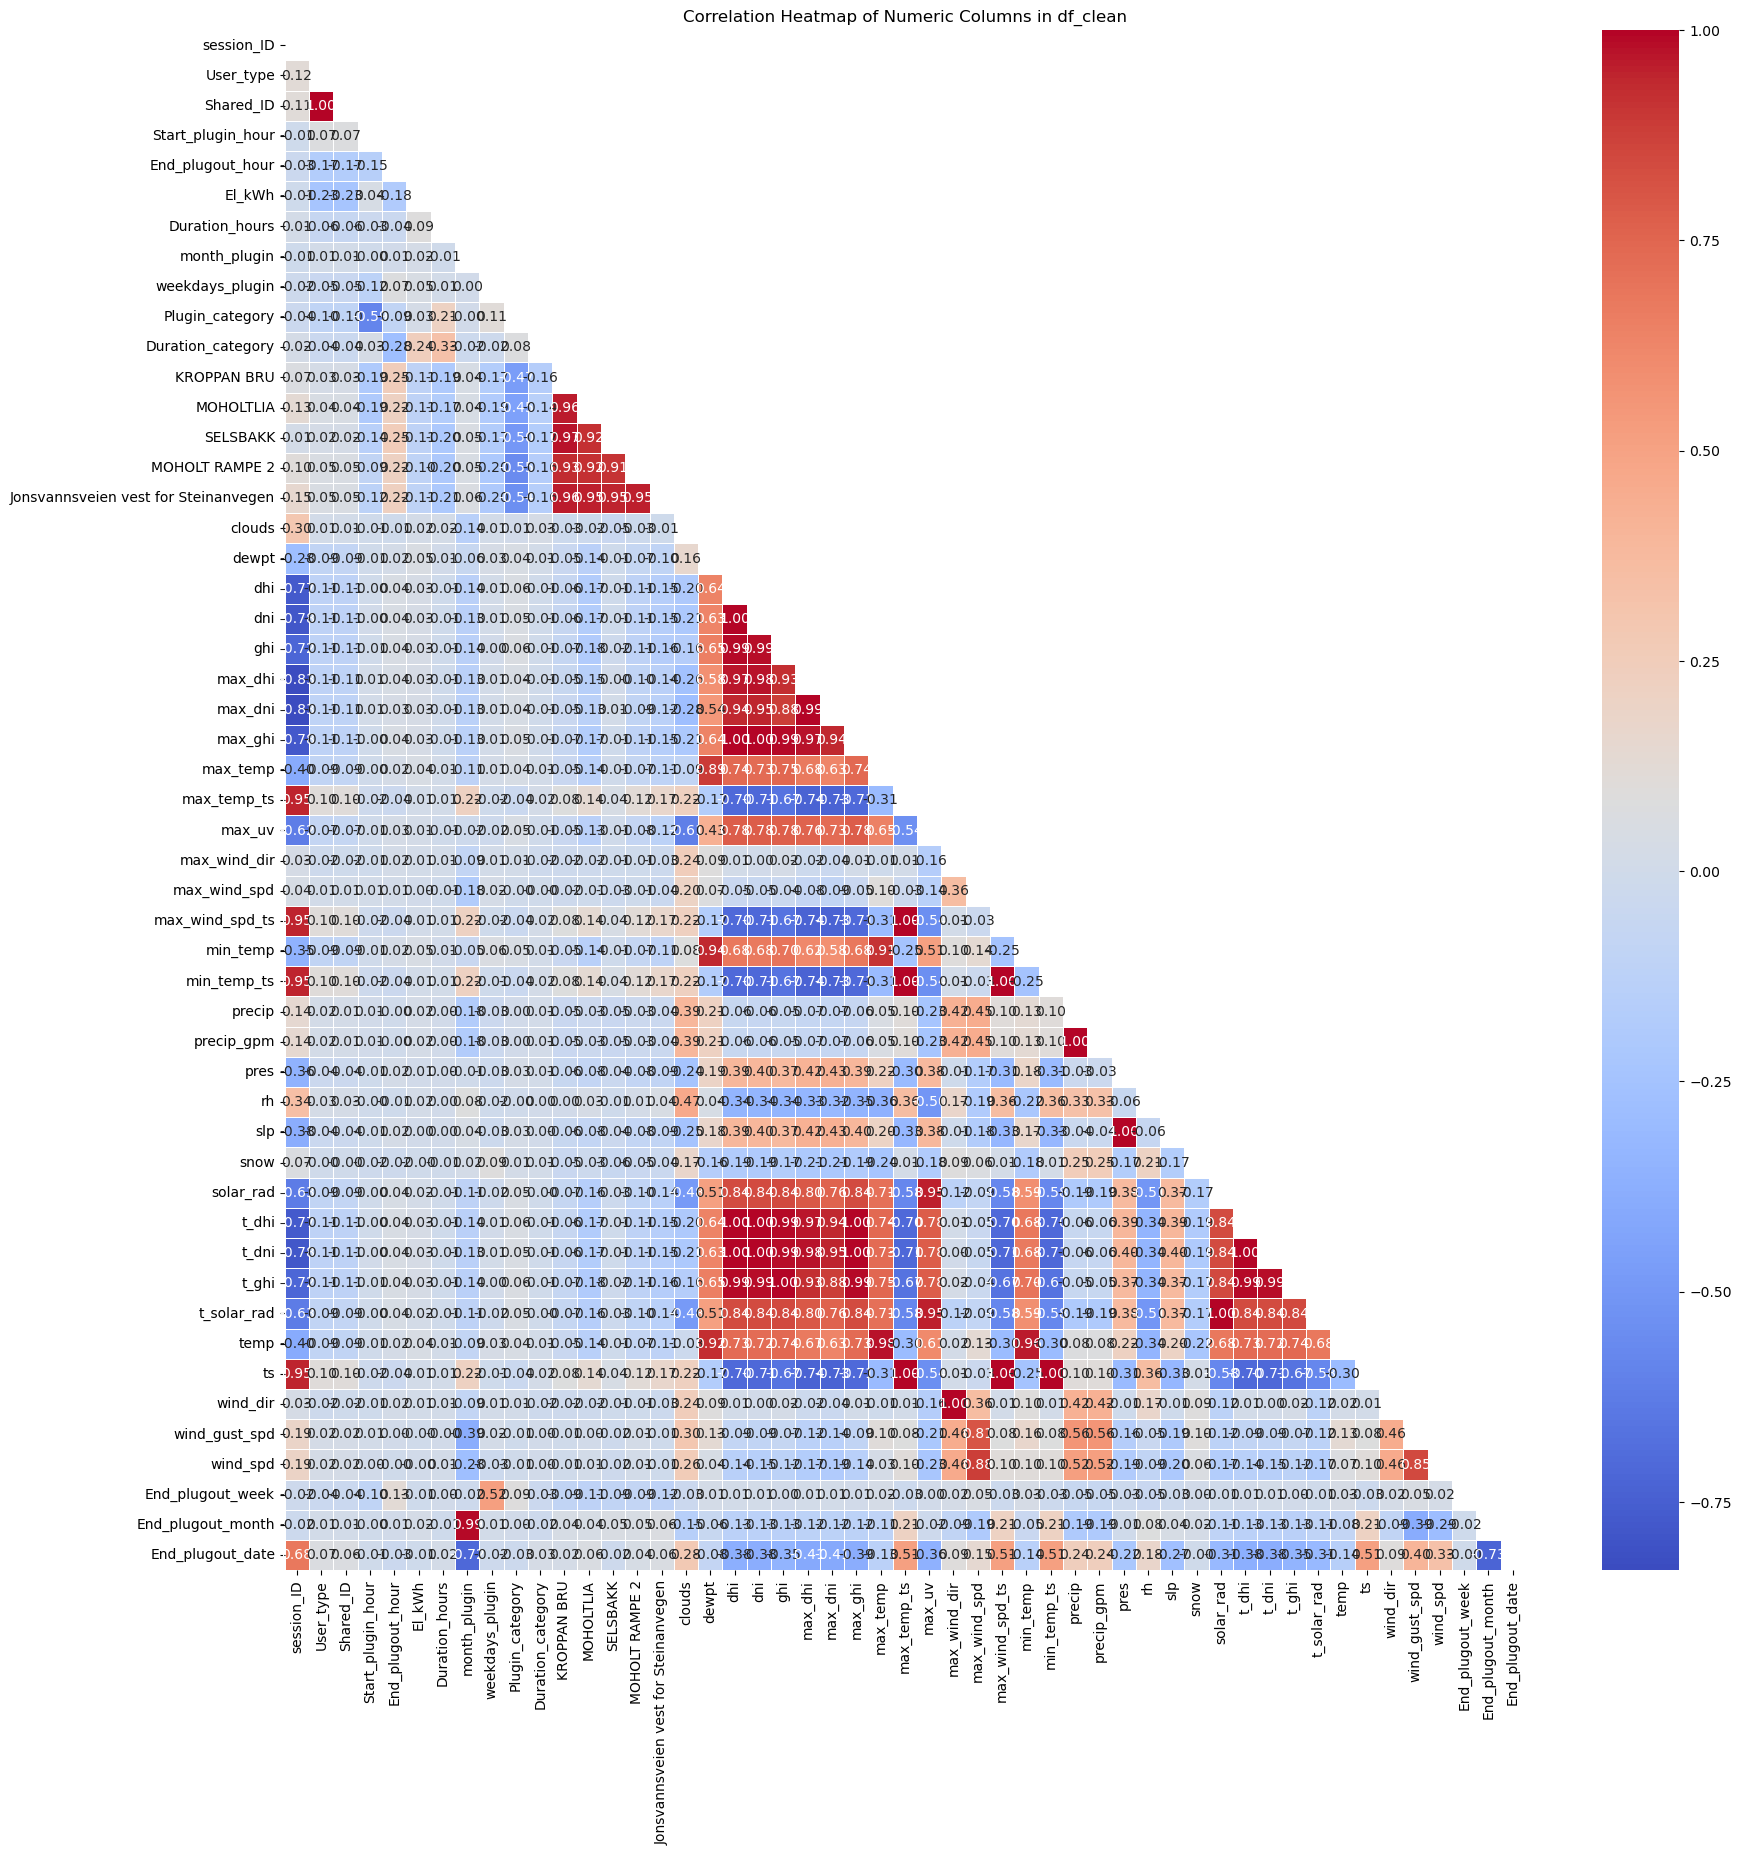

In [347]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_columns = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Mask for upper-triangular
mask = np.triu(correlation_matrix)

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, mask=mask)

# Show the plot
plt.title("Correlation Heatmap of Numeric Columns in df_clean")
plt.show()


As we can see our target variable is normaly correlated with our feature variables.

**Encoding Categorical Variables**

In [348]:
print(df['Garage_ID'].unique())
print(df['User_ID'].unique())



['Bl2' 'AdO1' 'UT9' 'AsO2' 'AdO3' 'Bl7' 'SR14' 'SR2' 'AsO4' 'AsO10' 'MS22'
 'UT1' 'MS1' 'UT15' 'AdA6' 'AdA1' 'UT7' 'AsO8' 'NR1' 'UT2' 'AsO6' 'Ris'
 'MS11' 'SR4']
['Bl2-4' 'AdO1-2' 'Share-12' 'Share-4' 'Share-8' 'Share-14' 'AdO3-2'
 'AdO3-4' 'Bl2-2' 'Share-6' 'Bl2-1' 'AsO2-1' 'Bl2-5' 'Bl2-6' 'AdO1-1'
 'AdO3-3' 'AdO1-3' 'Bl2-3' 'Share-9' 'Share-2' 'Share-13' 'AsO10-4'
 'Share-11' 'SR14-2' 'Share-7' 'Share-15' 'Bl7-1' 'Share-5' 'MS22-1'
 'Share-38' 'AsO6-1' 'Share-3' 'Share-20' 'Share-18' 'Share-39' 'Share-25'
 'Share-24' 'SR14-1' 'SR2-3' 'Share-26' 'Share-21' 'AsO4-2' 'Share-30'
 'UT15-2' 'AsO10-2' 'Share-23' 'Bl2-7' 'Share-36' 'UT1-2' 'AsO10-3'
 'Share-28' 'SR2-1' 'Bl2-8' 'AsO10-5' 'SR2-2' 'MS1-1' 'MS1-2' 'Share-29'
 'UT15-1' 'AdA6-1' 'Share-37' 'Share-22' 'AdA1-1' 'UT7-5' 'AsO8-3' 'NR1-3'
 'UT7-3' 'UT7-2' 'AsO10-1' 'NR1-2' 'Share-34' 'NR1-1' 'UT1-1' 'Share-35'
 'AsO4-1' 'AdO3-1' 'Share-16' 'Share-27' 'Share-31' 'AdO1-4' 'Share-1'
 'Share-17' 'UT2-1' 'UT7-1' 'Share-19' 'AsO8-4' 'Ris-2' 

In [349]:
df = pd.get_dummies(df, columns=['Garage_ID'], prefix='Garage_ID', dtype=int, drop_first=True)
df = pd.get_dummies(df, columns=['User_ID'], prefix='User_ID', dtype=int, drop_first=True)


In [350]:
# Sanity check
df.select_dtypes(include=['int']).head()


,session_ID,User_type,Shared_ID,Start_plugin_hour,End_plugout_hour,month_plugin,weekdays_plugin,Plugin_category,Duration_category,KROPPAN BRU,...,User_ID_Share-9,User_ID_UT1-1,User_ID_UT1-2,User_ID_UT15-1,User_ID_UT15-2,User_ID_UT2-1,User_ID_UT7-1,User_ID_UT7-2,User_ID_UT7-3,User_ID_UT7-5
0,24,1,5418,16,10,1,3,1,6,4232,...,0,0,0,0,0,0,0,0,0,0
1,25,1,5418,20,15,1,3,2,2,1772,...,0,0,0,0,0,0,0,0,0,0
2,28,0,343,16,17,1,4,1,1,4212,...,0,0,0,0,0,0,0,0,0,0
3,29,1,5418,23,18,1,4,3,2,443,...,0,0,0,0,0,0,0,0,0,0
4,30,0,343,15,17,1,5,1,1,5180,...,0,0,0,0,0,0,0,0,0,0


In [351]:
df.head()

,session_ID,User_type,Shared_ID,Start_plugin,Start_plugin_hour,End_plugout,End_plugout_hour,El_kWh,Duration_hours,month_plugin,...,User_ID_Share-9,User_ID_UT1-1,User_ID_UT1-2,User_ID_UT15-1,User_ID_UT15-2,User_ID_UT2-1,User_ID_UT7-1,User_ID_UT7-2,User_ID_UT7-3,User_ID_UT7-5
0,24,1,5418,2019-01-09 16:00:00,16,2019-01-10 10:20:00,10,187.0,1.757194e+09,1,...,0,0,0,0,0,0,0,0,0,0
1,25,1,5418,2019-01-09 20:00:00,20,2019-01-10 15:19:00,15,1038.0,1.833778e+09,1,...,0,0,0,0,0,0,0,0,0,0
2,28,0,343,2019-01-10 16:00:00,16,2019-01-10 17:20:00,17,51.0,8.319444e+08,1,...,0,0,0,0,0,0,0,0,0,0
3,29,1,5418,2019-01-10 23:00:00,23,2019-01-11 18:10:00,18,835.0,1.863139e+09,1,...,0,0,0,0,0,0,0,0,0,0
4,30,0,343,2019-01-11 15:00:00,15,2019-01-11 17:07:00,17,117.0,1.917778e+09,1,...,0,0,0,0,0,0,0,0,0,0


In [355]:
# Checking if it's any non convertible values 
non_convertible_values_df = pd.DataFrame(columns=['Column', 'Row'])

for col in df.columns:
    non_convertible_rows = pd.to_numeric(df[col], errors='coerce').isna()
    rows_with_nan = non_convertible_rows[non_convertible_rows].index
    non_convertible_values_df = pd.concat([non_convertible_values_df, pd.DataFrame({'Column': [col] * len(rows_with_nan), 'Row': rows_with_nan})])

print(non_convertible_values_df)


Empty DataFrame
Columns: [Column, Row]
Index: []


## Correlation heatmap

<Figure size 2000x2000 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap of Numerical Columns in df_clean')

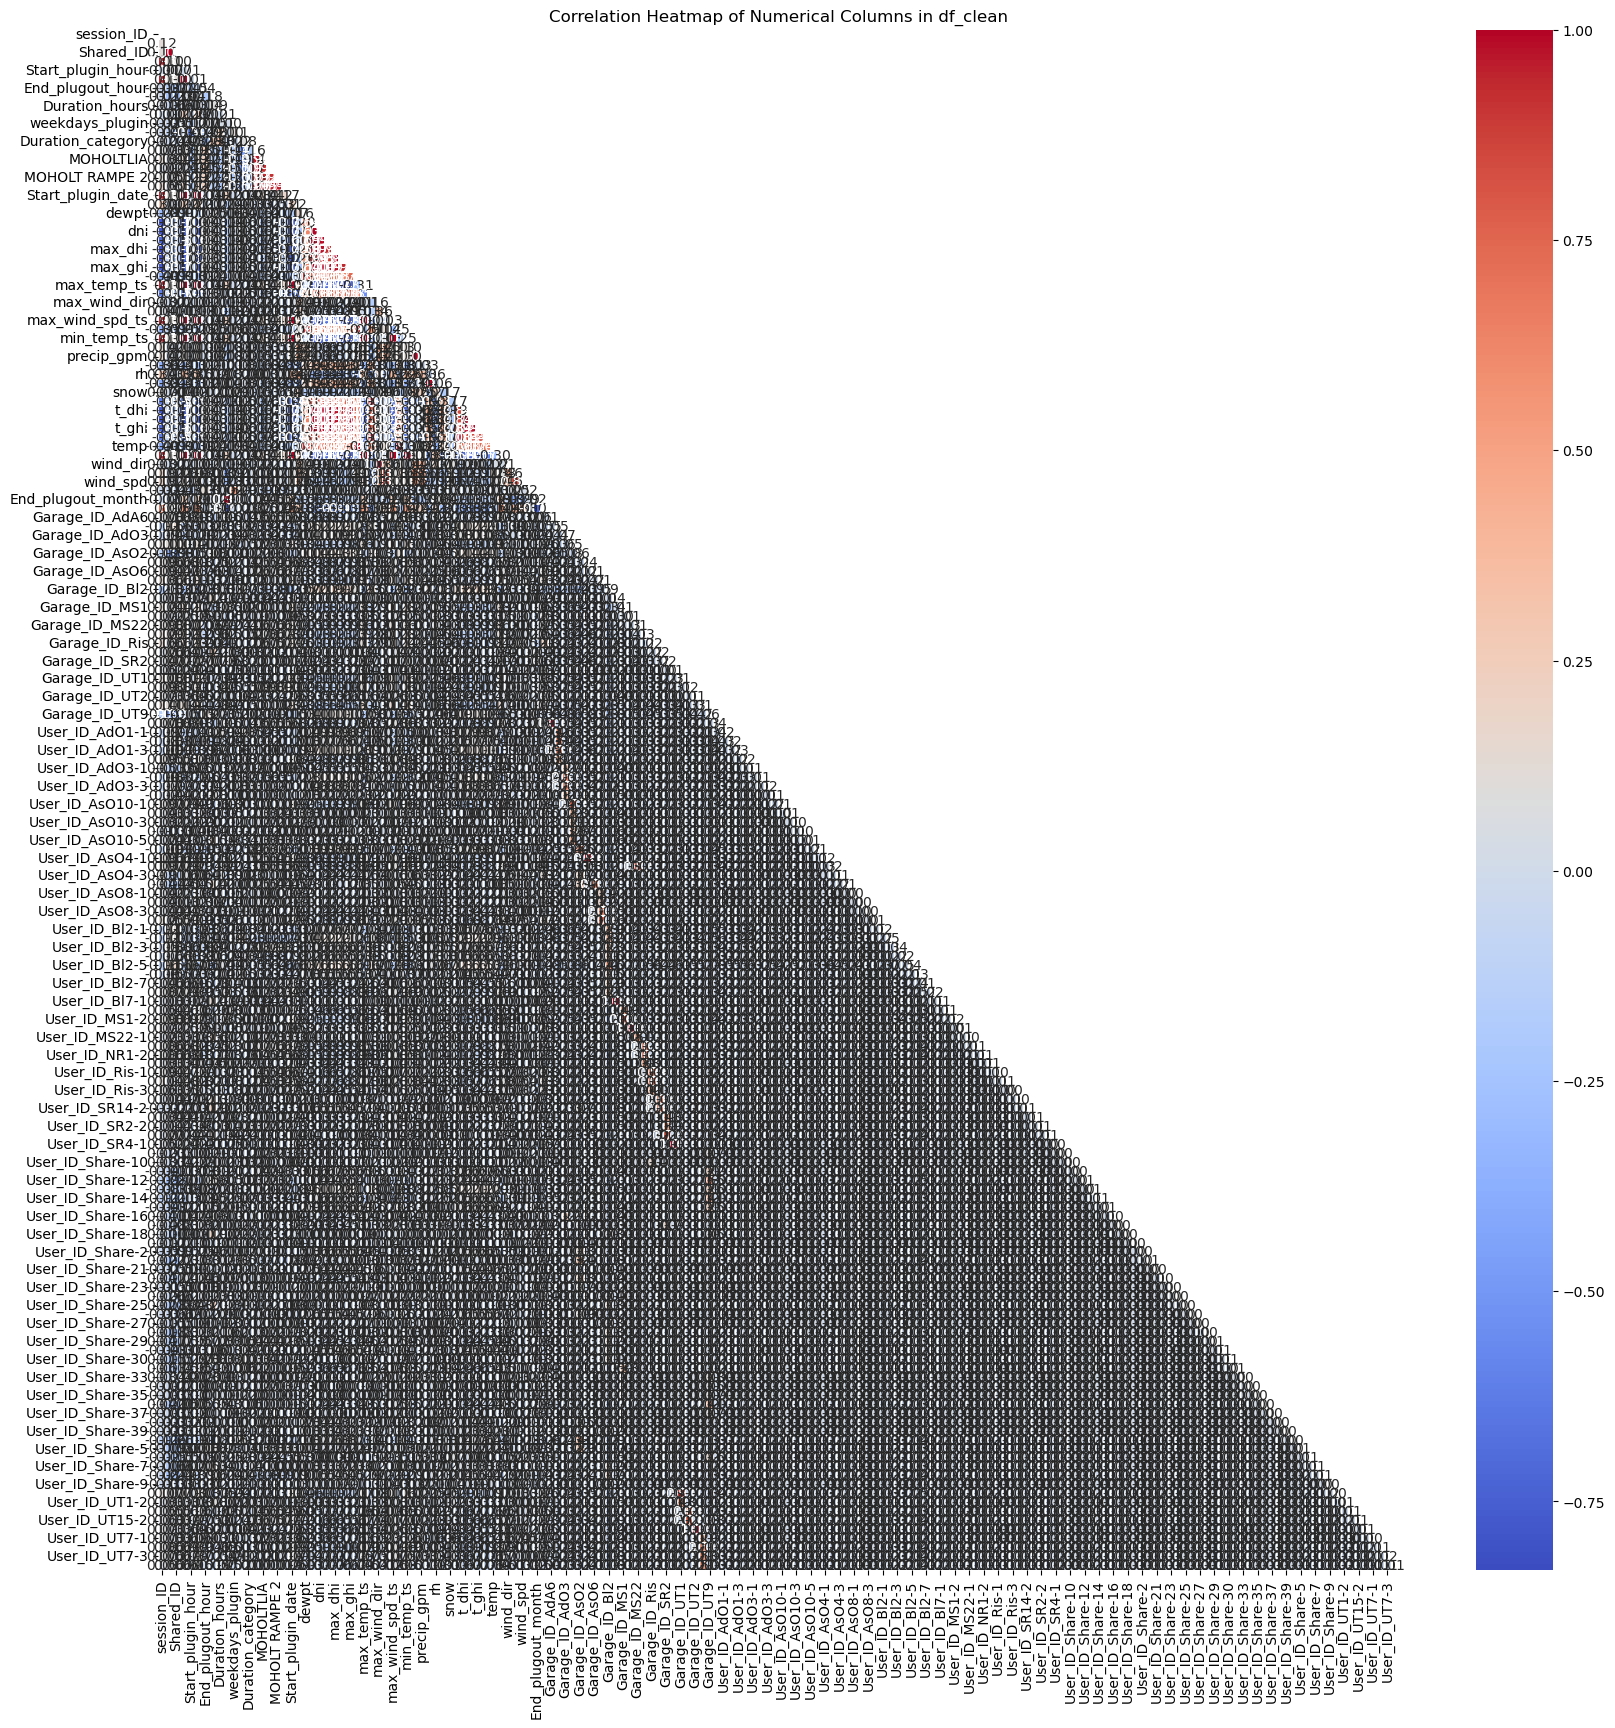

In [356]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Mask for upper-triangular
mask = np.triu(correlation_matrix)

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, mask=mask)

# Show the plot
plt.title("Correlation Heatmap of Numerical Columns in df_clean")
plt.show()

In [357]:
# saving transformed data
df.to_csv('/Users/zhassulan/Desktop/Capstone Project/energy_consumption_clean.csv', index=False)

## do I need to transform features or create dummy variables!?

In [167]:
df[['Start_plugin','month_plugin', 'weekdays_plugin', 'Start_plugin_date', 'Start_plugin_hour', 'End_plugout', 'End_plugout_month', 'End_plugout_week', 'End_plugout_date','End_plugout_hour']].head()


,Start_plugin,month_plugin,weekdays_plugin,Start_plugin_date,Start_plugin_hour,End_plugout,End_plugout_month,End_plugout_week,End_plugout_date,End_plugout_hour
0,2019-01-09 16:00:00,1,3,2019-01-09,16,2019-01-10 10:20:00,1,3,2019,10
1,2019-01-09 20:00:00,1,3,2019-01-09,20,2019-01-10 15:19:00,1,3,2019,15
2,2019-01-10 16:00:00,1,4,2019-01-10,16,2019-01-10 17:20:00,1,3,2019,17
3,2019-01-10 23:00:00,1,4,2019-01-10,23,2019-01-11 18:10:00,1,4,2019,18
4,2019-01-11 15:00:00,1,5,2019-01-11,15,2019-01-11 17:07:00,1,4,2019,17


**Assumption:**
- `start_plugin` year and month is same to `end_plugout` year and month.
